<a href="https://colab.research.google.com/github/kafeelkamran/cat-vs-dog-classifier/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:50<00:00, 22.9MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.6MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
#generators(generator used in this case -> image dataset from directory)

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#Normalize

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# Create a CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size =(3,3),padding = 'valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding ='valid'))

model.add(Conv2D(64,kernel_size =(3,3),padding = 'valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding ='valid'))

model.add(Conv2D(128,kernel_size =(3,3),padding = 'valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding ='valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer= 'adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [10]:
history = model.fit(train_ds,epochs = 10,validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 104ms/step - loss: 1.5621 - accuracy: 0.5852 - val_loss: 0.6916 - val_accuracy: 0.5576
Epoch 2/10
625/625 [==============================] - 70s 111ms/step - loss: 0.6068 - accuracy: 0.6618 - val_loss: 0.5661 - val_accuracy: 0.7114
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5152 - accuracy: 0.7395 - val_loss: 0.4948 - val_accuracy: 0.7662
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4506 - accuracy: 0.7841 - val_loss: 0.5839 - val_accuracy: 0.7362
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4068 - accuracy: 0.8057 - val_loss: 0.4634 - val_accuracy: 0.7892
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3515 - accuracy: 0.8347 - val_loss: 0.5507 - val_accuracy: 0.7872
Epoch 7/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3101 - accuracy: 0.8553 - val_loss: 0.5056 - val_ac

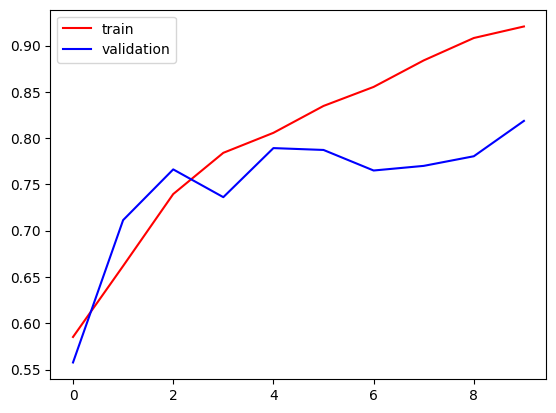

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

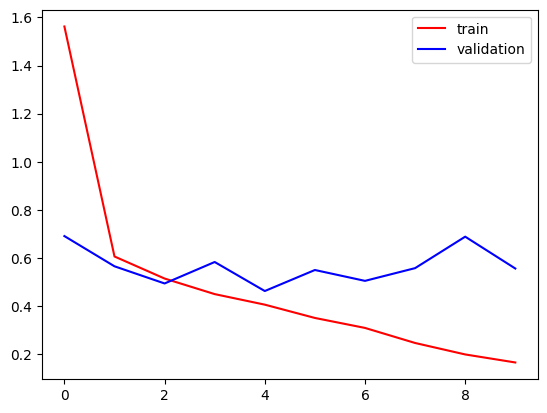

In [12]:
plt.plot(history.history['loss'],color = 'red',label = 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

In [13]:
import cv2

In [14]:
test_img = cv2.imread('/content/dog.jpg')

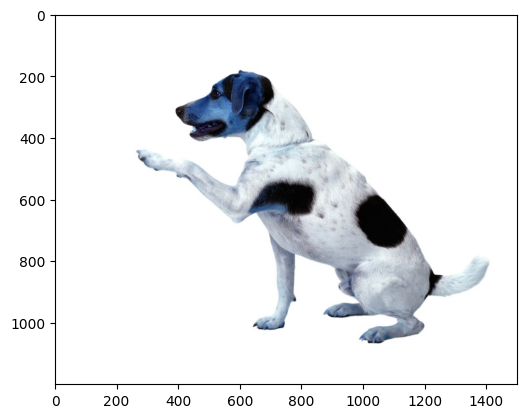

In [15]:
plt.imshow(test_img)

In [16]:
test_img.shape

(1200, 1500, 3)

In [17]:
test_img = cv2.resize(test_img,(256,256))

In [18]:
test_input = test_img.reshape(1,256,256,3)

In [19]:
model.predict(test_input)

1/1 [==============================] - 0s 407ms/step


array([[1.]], dtype=float32)

In [20]:
test_img = cv2.imread('/content/cat.jpg')

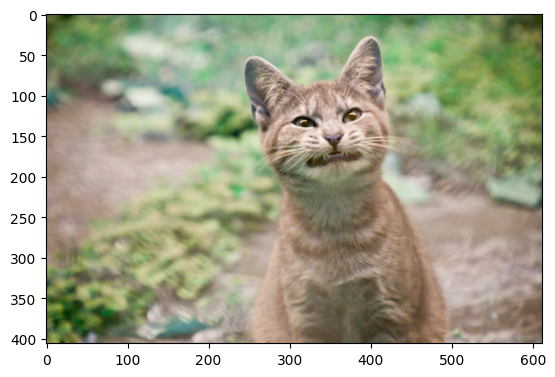

In [21]:
plt.imshow(test_img)

In [22]:
test_img.shape

(406, 612, 3)

In [23]:
test_img = cv2.resize(test_img,(256,256))

In [24]:
test_input = test_img.reshape(1,256,256,3)

In [25]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)